<a href="https://colab.research.google.com/github/james811223/Cervical-Cancer-Risk-Factor-Analysis/blob/master/Cervical_Cancer_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import KNNImputer as imp
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, sklearn as skl
from imblearn.combine import SMOTETomek as smote
%matplotlib inline

In [2]:
sns.set_style('darkgrid',{'figure.facecolor': 'lightblue'})

# Data Import + Wrangling

In [3]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', 
                     na_values='?')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Drop STDs: Time since first diagnosis, STDs: Time since last diagnosis columns, due to large amount of missing values.  
Last few columns are all potential targets, we'll use Biopsy and drop others.

In [4]:
df_raw.drop(columns = df_raw.columns[[26, 27, 29, 30, 31, 32, 33, 34, 35]], inplace = 1 == 1)

Biopsy will be used as target variable. Lets take a look.

In [5]:
df_raw['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

The data is highly imbalanced. I will drop the rows with missing data where Biospy is 0 to downsample a little bit.

In [6]:
b1 = df_raw.query('`Dx:Cancer` == 1')
b0 = df_raw.query('`Dx:Cancer` == 0').dropna()
df = pd.concat([b1,b0], ignore_index = 1 == 1)
df['Dx:Cancer'].value_counts()

0    651
1     18
Name: Dx:Cancer, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 669 non-null    int64  
 1   Number of sexual partners           669 non-null    float64
 2   First sexual intercourse            669 non-null    float64
 3   Num of pregnancies                  669 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             669 non-null    float64
 8   Hormonal Contraceptives (years)     669 non-null    float64
 9   IUD                                 669 non-null    float64
 10  IUD (years)                         669 non-null    float64
 11  STDs                                669 non-n

Drop Smokes column because we can know if someone is smoking using Smokes(Years) or Smokes(packs/year) columns.  
Drop IUD column because if IUD(years) > 0 then IUD is 1.  
Same reasoning for dropping Hormonal Contraceptives.  
Same reasoning for STDs, keeping only STDs(number).

In [8]:
df = df.iloc[:, [0, 1, 2, 3, 5, 6, 8, 10, 12, 26]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              669 non-null    int64  
 1   Number of sexual partners        669 non-null    float64
 2   First sexual intercourse         669 non-null    float64
 3   Num of pregnancies               669 non-null    float64
 4   Smokes (years)                   668 non-null    float64
 5   Smokes (packs/year)              668 non-null    float64
 6   Hormonal Contraceptives (years)  669 non-null    float64
 7   IUD (years)                      669 non-null    float64
 8   STDs (number)                    669 non-null    float64
 9   Dx:Cancer                        669 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 52.4 KB


Split data first to avoid any manipulation to testing data.  
We'll only use the data with no missing values for our testing data set.

In [9]:
df_clean = df.dropna()
df_clean['Dx:Cancer'].value_counts()

0    651
1     17
Name: Dx:Cancer, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = tts(df_clean.drop(columns = ['Dx:Cancer']), df_clean['Dx:Cancer'], test_size = 10/45, 
                                       stratify = df_clean['Dx:Cancer'])
train = df.drop(X_test.index)
X_train = train.drop(columns = ['Dx:Cancer'])
y_train = train['Dx:Cancer'].copy()

Imputation for completing missing values using k-Nearest Neighbors.

In [11]:
X_train = pd.DataFrame(imp().fit_transform(X_train), columns = X_train.columns)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              520 non-null    float64
 1   Number of sexual partners        520 non-null    float64
 2   First sexual intercourse         520 non-null    float64
 3   Num of pregnancies               520 non-null    float64
 4   Smokes (years)                   520 non-null    float64
 5   Smokes (packs/year)              520 non-null    float64
 6   Hormonal Contraceptives (years)  520 non-null    float64
 7   IUD (years)                      520 non-null    float64
 8   STDs (number)                    520 non-null    float64
dtypes: float64(9)
memory usage: 36.7 KB


In [12]:
X_train = X_train.astype(int)

# EDA

### Check for skewness with histogram

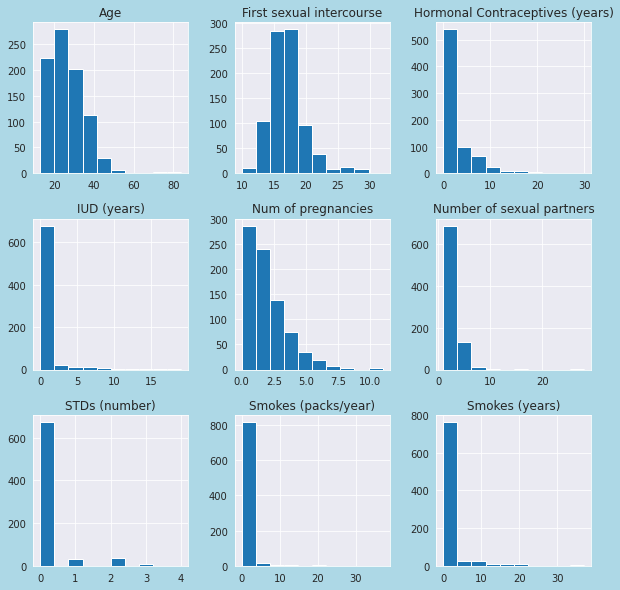

In [13]:
p = df_raw[X_train.columns].hist(figsize = (10, 10))

All columns seem to be right skewed. In addition, HC, IUD, number of sexual partners, STDs, smokes columns seems to be skewed a lot with most values being 0.  
We might need to do some processing to reduce the skewness.

### Check for outliers.

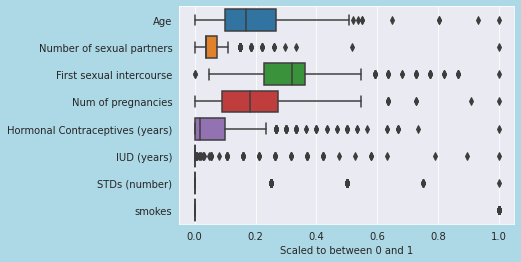

In [102]:
gdf = skl.preprocessing.MinMaxScaler().fit_transform(df_raw.rename(columns={'Smokes': 'smokes'})[X_train.columns])
gdf = pd.DataFrame(gdf, columns = X_train.columns).melt()
sns.boxplot('value', 'variable', data = gdf)
plt.xlabel('Scaled to between 0 and 1')
p = plt.ylabel('')

During modeling, we might need to try dealing with outliers.

### Check for Dx:Cancer to different features relationships.

(-0.3500000000000001, 7.0)

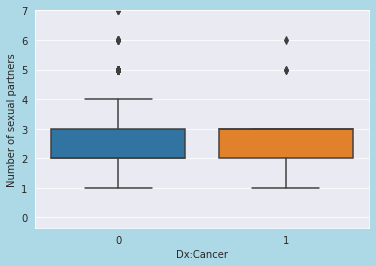

In [112]:
sns.boxplot('Dx:Cancer', 'Number of sexual partners', data = df_raw);plt.ylim(top=7)

In [104]:
X_train.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)', 'smokes'],
      dtype='object')

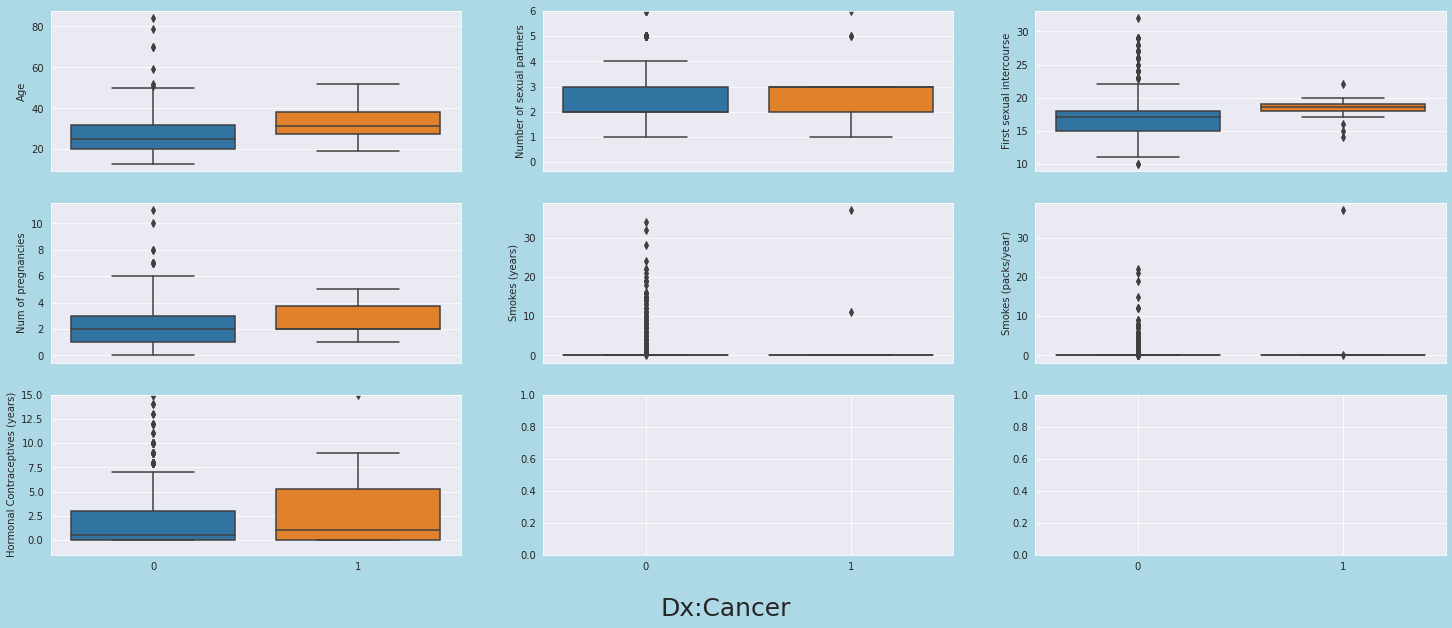

In [15]:
fig, axs = plt.subplots(3, 3, sharex = 1 == 1, figsize = (25, 10))
axs = axs.flatten()
ax = iter(axs)
for col in X_train.columns[:-2]:
    a = next(ax)
    sns.boxplot('Dx:Cancer', col, ax = a, data = df_raw)
    a.set_xlabel('')
    a.set_ylabel(col)
t = fig.text(0.5, 0.04, 'Dx:Cancer', ha='center', size = 25)
axs[1].set_ylim(top = 6)
p = axs[6].set_ylim(top = 15)

* People diagnosed with cancer seems to be older than those not diagnosed with cancer on average.
* It doesn't seem to be having much difference of the average number of sexual partners between people diagnosed with cancer and those are not.
* It seems like people diagnose with cancer have later first sexual intercourse than people not dignosed with cancer.
* People diagnosed with cancer seems to be having a little higher number of pregnancies than those not diagnosed with cancer on average.
* People diagnosed with cancer seems to be having a little higher HC years than those not diagnosed with cancer on average.
* Smokes, HC, IUD, and STDs columns are all mostly 0.

### Check features correlations

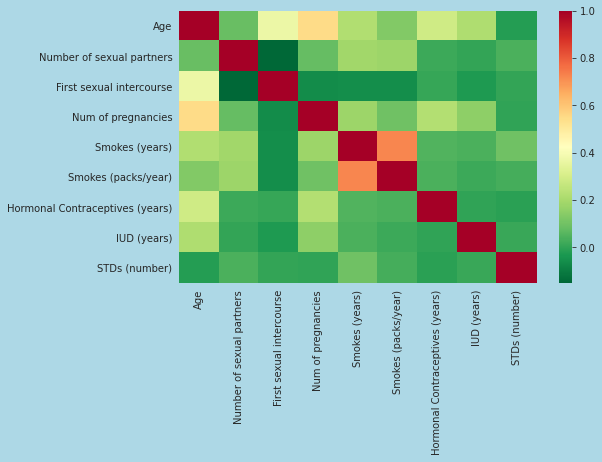

In [16]:
plt.figure(figsize = (8, 5))
p = sns.heatmap(df_raw[X_train.columns].corr(), cmap="RdYlGn_r")

The only features that are alarmingly correlated to each other are the smokes columns, which is no surprise. These columns will be combined into 1.

# Pre-processing

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              520 non-null    int64
 1   Number of sexual partners        520 non-null    int64
 2   First sexual intercourse         520 non-null    int64
 3   Num of pregnancies               520 non-null    int64
 4   Smokes (years)                   520 non-null    int64
 5   Smokes (packs/year)              520 non-null    int64
 6   Hormonal Contraceptives (years)  520 non-null    int64
 7   IUD (years)                      520 non-null    int64
 8   STDs (number)                    520 non-null    int64
dtypes: int64(9)
memory usage: 36.7 KB


## Perform binning

In [18]:
X_train_bin = X_train.copy()
X_test_bin = X_test.copy()

In [19]:
X_train_bin.Age = X_train_bin.Age.values//10
X_test_bin.Age = X_test_bin.Age.values//10

In [20]:
X_train_bin[['Number of sexual partners']].describe().T

,count,mean,std,min,25%,50%,75%,max
Number of sexual partners,520.0,2.469231,1.319418,1.0,1.0,2.0,3.0,8.0


In [21]:
X_train_bin['Number of sexual partners'] = pd.cut(X_train_bin['Number of sexual partners'], [0, 1, 3, 99], labels = [1, 2, 3]).astype(int)
X_test_bin['Number of sexual partners'] = pd.cut(X_test_bin['Number of sexual partners'], [0, 1, 3, 99], labels = [1, 2, 3]).astype(int)

In [22]:
X_train_bin[['First sexual intercourse']].describe().T

,count,mean,std,min,25%,50%,75%,max
First sexual intercourse,520.0,17.201923,2.912268,11.0,15.0,17.0,18.0,32.0


In [23]:
X_train_bin['First sexual intercourse'] = pd.cut(X_train_bin['First sexual intercourse'], [9, 16, 25, 99], labels = [1, 2, 3]).astype(int)
X_test_bin['First sexual intercourse'] = pd.cut(X_test_bin['First sexual intercourse'], [9, 16, 25, 99], labels = [1, 2, 3]).astype(int)

In [24]:
X_train_bin[['Num of pregnancies']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num of pregnancies,520.0,2.265385,1.386264,0.0,1.0,2.0,3.0,7.0


In [25]:
X_train_bin['Num of pregnancies'] = pd.cut(X_train_bin['Num of pregnancies'], [-1, 0, 2, 4, 99], labels = [0, 1, 2, 3]).astype(int)
X_test_bin['Num of pregnancies'] = pd.cut(X_test_bin['Num of pregnancies'], [-1, 0, 2, 4, 99], labels = [0, 1, 2, 3]).astype(int)

In [26]:
X_train_bin[['Hormonal Contraceptives (years)']].describe().T

,count,mean,std,min,25%,50%,75%,max
Hormonal Contraceptives (years),520.0,2.336538,3.94131,0.0,0.0,0.0,3.0,22.0


In [28]:
X_train_bin['Hormonal Contraceptives (years)'].value_counts()

0     277
1      68
2      29
5      24
3      21
6      19
7      15
4      14
8      14
9      10
10      9
15      6
12      3
20      2
11      2
16      2
13      1
14      1
17      1
19      1
22      1
Name: Hormonal Contraceptives (years), dtype: int64

In [27]:
X_train_bin['Hormonal Contraceptives (years)'] = pd.cut(X_train_bin['Hormonal Contraceptives (years)'], [-1, 0, 1, 4, 99],\
                                                        labels = [0, 1, 2, 3]).astype(int)
X_test_bin['Hormonal Contraceptives (years)'] = pd.cut(X_test_bin['Hormonal Contraceptives (years)'], [-1, 0, 1, 4, 99],\
                                                       labels = [0, 1, 2, 3]).astype(int)

In [28]:
X_train_bin[['STDs (number)']].describe().T

,count,mean,std,min,25%,50%,75%,max
STDs (number),520.0,0.165385,0.547858,0.0,0.0,0.0,0.0,4.0


In [31]:
X_train_bin['STDs (number)'].value_counts()

0    467
2     26
1     23
3      3
4      1
Name: STDs (number), dtype: int64

STDs (number) column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [29]:
X_train_bin['STDs (number)'] = (X_train_bin['STDs (number)'].values > 0).astype(int)
X_test_bin['STDs (number)'] = (X_test_bin['STDs (number)'].values > 0).astype(int)

In [33]:
X_train_bin[['IUD (years)']].describe().T

,count,mean,std,min,25%,50%,75%,max
IUD (years),520.0,0.563462,2.095001,0.0,0.0,0.0,0.0,19.0


In [34]:
X_train_bin['IUD (years)'].value_counts()[:6]

0    469
3      9
8      7
5      6
7      5
2      5
Name: IUD (years), dtype: int64

IUD (years) column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [30]:
X_train_bin['IUD (years)'] = (X_train_bin['IUD (years)'].values > 0).astype(int)
X_test_bin['IUD (years)'] = (X_test_bin['IUD (years)'].values > 0).astype(int)


## Combine 2 smokes columns

In [31]:
X_train['smokes'] = X_train['Smokes (packs/year)'].values * X_train['Smokes (years)'].values
X_test['smokes'] = X_test['Smokes (packs/year)'].values * X_test['Smokes (years)'].values
X_train.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_test.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_train_bin['smokes'] = X_train_bin['Smokes (packs/year)'].values * X_train_bin['Smokes (years)'].values
X_test_bin['smokes'] = X_test_bin['Smokes (packs/year)'].values * X_test_bin['Smokes (years)'].values
X_train_bin.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_test_bin.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)

In [32]:
X_train_bin[['smokes']].describe().T

,count,mean,std,min,25%,50%,75%,max
smokes,520.0,5.492308,37.070936,0.0,0.0,0.0,0.0,484.0


In [38]:
X_train_bin['smokes'].value_counts()[:10]

0     472
2       4
16      4
9       3
36      2
6       2
7       2
18      2
22      2
28      2
Name: smokes, dtype: int64

smokes column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [33]:
X_train_bin.smokes = (X_train_bin.smokes.values > 0).astype(int)
X_test_bin.smokes = (X_test_bin.smokes.values > 0).astype(int)

## Use Smote Algorithm to deal with imbalance data.

In [ ]:
X_smote_bin, y_smote_bin = smote().fit_resample(X_train_bin, y_train)
X_smote, y_smote = smote().fit_resample(X_train, y_train)
X_smote_bin = pd.DataFrame(X_smote_bin, columns = X_train_bin.columns)
X_smote = pd.DataFrame(X_smote, columns = X_train.columns)

### Scale data

In [35]:
scaler = skl.preprocessing.MinMaxScaler()
scaler.fit(X_smote)
X_smote_scale = pd.DataFrame(scaler.transform(X_smote), columns = X_smote.columns)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns = X_smote.columns)

# Modeling

In [36]:
grids = {
    'Random Forest': {'n_estimators': [50, 100, 200, 500], 
                     'criterion': ['gini', 'entropy'], 
                     'min_samples_split': [2, 5, 10, 20]},
    
    'Ada Boosted Decision Tree': {'n_estimators': [50, 100, 200, 500], 
                     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
                     'algorithm': ['SAMME', 'SAMME.R']},
         
    'Gradient Boosted Decision Tree': {'learning_rate': [.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                                       'n_estimators': [20, 50, 100, 200],
                                       'criterion': ['friedman_mse', 'mse', 'mae'],
                                       'min_samples_split': [2, 5, 10, 20],
                                       'max_depth': [3, 5, 7]},
         
    'SVM': {'C': [10**p for p in range(-2, 3)],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3 , 4],
            'gamma': ['scale', 'auto'],
            'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None]},
    
    'KNN': {'n_neighbors': [3, 5, 8 , 10, 20],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [20, 25, 30 , 35, 40],
            'p': range(1, X_smote_bin.shape[0] + 1),
            'weights': ['uniform', 'distance']},
    
    'Logistic Regression': {'C':  [10**p for p in range(-2, 3)],
                            'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None],
                            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                            'penalty': ['l1', 'l2', 'elasticnet']},
    
    'Ridge Regression Classifier': {'alpha': [.1, 1, 1.5, 2, 2.5],
                                    'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None],
                                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
}
clfs = [skl.ensemble.RandomForestClassifier(), skl.ensemble.AdaBoostClassifier(), 
                                       skl.ensemble.GradientBoostingClassifier(),skl.svm.SVC(), skl.neighbors.KNeighborsClassifier(), 
                                       skl.linear_model.LogisticRegression(), skl.linear_model.RidgeClassifier()]
score = skl.metrics.make_scorer(skl.metrics.f1_score)

### Use the unbinned scaled data with SMOTE for model selection.

In [113]:
scores = []
params = []
for grid, mod in zip(grids.values(), clfs):
    clf = skl.model_selection.RandomizedSearchCV(mod, grid, scoring = score, cv = 3)
    search = clf.fit(X_smote_scale, y_smote)
    params += [search.best_params_]
    scores += [search.best_score_.round(2)]
df_models = pd.DataFrame({'model': list(grids.keys()), 'cv_score_recall': scores, 'parameters': params, 'note': 'Scaled'})
df_models

,model,cv_score_recall,parameters,note
0,Random Forest,0.94,"{'n_estimators': 500, 'min_samples_split': 2, ...",Scaled
1,Ada Boosted Decision Tree,0.86,"{'n_estimators': 100, 'learning_rate': 1, 'alg...",Scaled
2,Gradient Boosted Decision Tree,0.93,"{'n_estimators': 200, 'min_samples_split': 20,...",Scaled
3,SVM,0.82,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2...",Scaled
4,KNN,0.88,"{'weights': 'distance', 'p': 120, 'n_neighbors...",Scaled
5,Logistic Regression,0.71,"{'solver': 'newton-cg', 'penalty': 'l2', 'clas...",Scaled
6,Ridge Regression Classifier,0.75,"{'solver': 'svd', 'class_weight': {0: 0.4, 1: ...",Scaled


Seems like Random Forest and GB Decision tree has the best predicting power. We'll just use Random Forest.

In [42]:
best_params = df_models.parameters[0]

### Scaling doesn't matter for Random Forest, but let's double check.

In [44]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote, y_smote, scoring = score, cv = 3).mean().round(2)

0.94

### Check if using binned data improve the predicting power of Random Forest.

In [45]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote_bin, y_smote_bin, scoring = score, cv = 3).mean().round(2)

0.91

Binning data seems to reduce the model's predicting power.

### Random Forest is robust to skewed features, but lets just double check.

In [46]:
X_smote.skew()

Age                                 0.205773
Number of sexual partners           0.854807
First sexual intercourse            1.338728
Num of pregnancies                  1.049149
Hormonal Contraceptives (years)     2.064970
IUD (years)                         3.373078
STDs (number)                       4.820975
smokes                             13.872667
dtype: float64

Log tranform to reduce skewness

In [47]:
def log_trans(x):
    if x == 0: return np.log(.00000001)
    return np.log(x)
X_smote_log = X_smote.applymap(log_trans)
X_smote_log.skew()

Age                               -0.411387
Number of sexual partners         -0.312371
First sexual intercourse           0.424371
Num of pregnancies                -7.894362
Hormonal Contraceptives (years)   -0.024516
IUD (years)                        0.996258
STDs (number)                      3.575545
smokes                             3.268745
dtype: float64

The log transformation helped to reduce the skewness except STDs. 

In [48]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote_log, y_smote, scoring = score, cv = 3).mean().round(2)

0.94

No effect as expected.

### Try dropping some features

In [49]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
clf.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Check for important features

In [50]:
feat_imp = pd.Series(clf.feature_importances_, index = X_smote.columns).sort_values(ascending = 1 == 2)
feat_imp

Age                                0.259308
First sexual intercourse           0.256354
IUD (years)                        0.152799
Hormonal Contraceptives (years)    0.110145
Number of sexual partners          0.086520
Num of pregnancies                 0.086447
STDs (number)                      0.026253
smokes                             0.022173
dtype: float64

Use top 5 most important features to see if model improves.

In [51]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote[feat_imp.index[:5]], y_smote, scoring = score, cv = 3).mean().round(2)

0.92

Dropping features does not improve the model.

# Final model
The final model would be Random Forest with original data scale.

Try and see if we can improve model performance by using Bayesian Optimization for hyper parameters tuning.

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [54]:
def rf_cv_f1(criterion, min_samples_split, n_estimators):
    criterion, min_samples_split, n_estimators = [int(x) for x in [criterion, min_samples_split, n_estimators]]
    criterion_dict = {1:'gini', 2:'entropy'}
    rf = skl.ensemble.RandomForestClassifier(criterion = criterion_dict[criterion], min_samples_split = min_samples_split, 
                                             n_estimators = n_estimators)
    return skl.model_selection.cross_val_score(rf, X_smote, y_smote, scoring = score, cv = 3).mean().round(2)

def get_params(dict_):
    dict_['criterion'] = {1:'gini', 2:'entropy'}[int(dict_['criterion'])]
    dict_['min_samples_split'] = int(dict_['min_samples_split'])
    dict_['n_estimators'] = int(dict_['n_estimators'])
    return dict_

rf_bo = BayesianOptimization(rf_cv_f1, {'criterion': (1, 2.99999), 'min_samples_split': (2, 500), 'n_estimators': (50, 500)})
rf_bo.maximize(n_iter = 20)

|   iter    |  target   | criterion | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.9      |  1.833    |  29.75    |  386.8    |
|  2        |  0.9      |  2.739    |  25.94    |  461.8    |
|  3        |  0.82     |  2.759    |  304.4    |  324.5    |
|  4        |  0.22     |  1.098    |  466.4    |  244.9    |
|  5        |  0.82     |  2.277    |  295.9    |  460.5    |
|  6        |  0.9      |  1.211    |  27.49    |  387.1    |
|  7        |  0.94     |  1.384    |  2.198    |  51.96    |
|  8        |  0.83     |  1.281    |  207.4    |  50.08    |
|  9        |  0.84     |  1.08     |  117.5    |  192.1    |
|  10       |  0.84     |  1.002    |  167.6    |  413.3    |
|  11       |  0.22     |  2.521    |  499.5    |  496.5    |
|  12       |  0.94     |  2.444    |  2.571    |  207.9    |
|  13       |  0.85     |  2.604    |  77.54    |  51.38    |
|  14       |  0.94     |  1.602    |  2.452    |  119.4    |
|  15   

In [55]:
best_params = get_params(rf_bo.max['params'])

No better hyperparameter found. However we can still use the best parameters found here which has the same performance like random search.

In [66]:
final_model = skl.ensemble.RandomForestClassifier(**best_params)
final_model.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Look at our testing data

In [63]:
y_test.value_counts(normalize = 1 == 1)

0    0.973154
1    0.026846
Name: Dx:Cancer, dtype: float64

There're only about 7% of the people diagnosed with cancer.

# Check how the model performs on testing data

In [114]:
report = skl.metrics.classification_report(y_test, final_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       145
           1       0.17      0.50      0.25         4

    accuracy                           0.92       149
   macro avg       0.58      0.72      0.60       149
weighted avg       0.96      0.92      0.94       149



The model can correctly predict about 40% of the cancer patients in our testing data. This is not good, but It's still a lot better than just doing some random guessing.

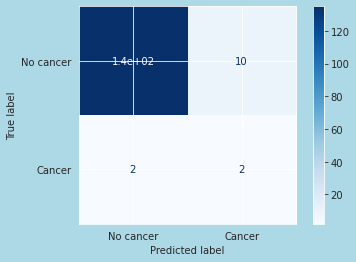

In [88]:
p = skl.metrics.plot_confusion_matrix(final_model, X_test, y_test, cmap = 'Blues',display_labels = ['No cancer', 'Cancer'])

Lets see what are the important features for predicting cancer.

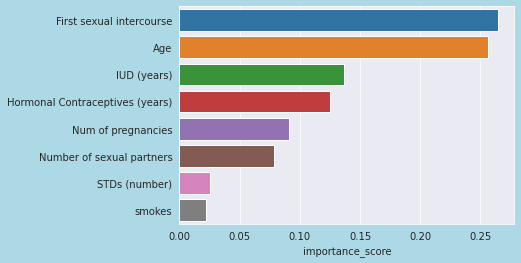

In [89]:
imp_feat = pd.Series(final_model.feature_importances_, index = X_smote.columns).sort_values(ascending = 1 == 2).reset_index()
imp_feat.columns = ['feature', 'importance_score']
sns.barplot('importance_score', 'feature', data = imp_feat)
p = plt.ylabel('')

* Age & First sexual intercourse are the 2 high risk factors for Cervical Cancer.
* HC, & IUD are the 2 medium risk factors for Cervical Cancer.